In [1]:
# Project : Telecommunication Churn

# Model training

In [2]:
# loading preprocessed training data

import pandas as pd

X_train = pd.read_csv("X_train_transformed.csv")
y_train = pd.read_csv("y_train_transformed.csv")

y_train = y_train.squeeze()

In [3]:
# importing grid search cv for cross validation & hyperparameter search
from sklearn.model_selection import GridSearchCV

# pipeline for pipelining SMOTE & model
from imblearn.pipeline import Pipeline

# SMOTE for over sampling (handling imbalance)
from imblearn.over_sampling import SMOTE

In [4]:
# Logistic Regression model training

from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(random_state=38,max_iter=1000)

In [5]:
# pipeline & hyperparameters dict

lr_pipeline = Pipeline([
    ('smote', SMOTE(random_state=38)),
    ('lr', lr_model)
])

lr_params = [
    {
        # liblinear
        'lr__penalty': ['l1', 'l2'],
        'lr__C': [0.01, 0.1, 1, 10, 100],
        'lr__solver': ['liblinear']
    },
    {
        # saga
        'lr__penalty': ['l1', 'l2', 'elasticnet'],
        'lr__C': [0.01, 0.1, 1, 10, 100],
        'lr__solver': ['saga'],
        'lr__l1_ratio': [0.1, 0.25, 0.75, 0.9]
    }
]

In [6]:
# fitting model

lr_grid = GridSearchCV(
    lr_pipeline,
    param_grid = lr_params,
    cv = 5,
    scoring='roc_auc'
)

lr_grid.fit(X_train, y_train)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('smote', SMOTE(random_state=38)),
                                       ('lr',
                                        LogisticRegression(max_iter=1000,
                                                           random_state=38))]),
             param_grid=[{'lr__C': [0.01, 0.1, 1, 10, 100],
                          'lr__penalty': ['l1', 'l2'],
                          'lr__solver': ['liblinear']},
                         {'lr__C': [0.01, 0.1, 1, 10, 100],
                          'lr__l1_ratio': [0.1, 0.25, 0.75, 0.9],
                          'lr__penalty': ['l1', 'l2', 'elasticnet'],
                          'lr__solver': ['saga']}],
             scoring='roc_auc')

In [7]:
# best parameters & score

print("Best Params:", lr_grid.best_params_)
print("Best ROC-AUC:", lr_grid.best_score_)

Best Params: {'lr__C': 0.1, 'lr__l1_ratio': 0.1, 'lr__penalty': 'l1', 'lr__solver': 'saga'}
Best ROC-AUC: 0.8002682219218537


In [8]:
# adding best model to best_models dict

best_models ={}

best_models['Logistic-Regression'] = lr_grid.best_estimator_.named_steps['lr']

In [9]:
# Decision Tree Classifier model training

from sklearn.tree import DecisionTreeClassifier

dtc_model = DecisionTreeClassifier(random_state=38)

In [10]:
# pipeline & hyperparameters dict

dtc_pipeline = Pipeline([
    ('smote', SMOTE(random_state=38)),
    ('dtc', dtc_model)
])

dtc_params = {
    'dtc__criterion': ['gini', 'entropy', 'log_loss'],
    'dtc__max_depth': [2,3,4,5],
    'dtc__min_samples_split': [10,15,25],
    'dtc__min_samples_leaf': [10,15,25,50,100],
    'dtc__max_features': [None, 'sqrt', 'log2']
}

In [11]:
# model fitting

dtc_grid = GridSearchCV(
    dtc_pipeline,
    param_grid = dtc_params,
    cv = 5,
    scoring='roc_auc'
)

dtc_grid.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('smote', SMOTE(random_state=38)),
                                       ('dtc',
                                        DecisionTreeClassifier(random_state=38))]),
             param_grid={'dtc__criterion': ['gini', 'entropy', 'log_loss'],
                         'dtc__max_depth': [2, 3, 4, 5],
                         'dtc__max_features': [None, 'sqrt', 'log2'],
                         'dtc__min_samples_leaf': [10, 15, 25, 50, 100],
                         'dtc__min_samples_split': [10, 15, 25]},
             scoring='roc_auc')

In [12]:
# best parameters & score

print("Best Params:", dtc_grid.best_params_)
print("Best ROC-AUC:", dtc_grid.best_score_)

Best Params: {'dtc__criterion': 'entropy', 'dtc__max_depth': 5, 'dtc__max_features': None, 'dtc__min_samples_leaf': 15, 'dtc__min_samples_split': 10}
Best ROC-AUC: 0.8912447437328875


In [13]:
# adding best model to best_models dict

best_models['Decision-Tree-classifier'] = dtc_grid.best_estimator_.named_steps['dtc']

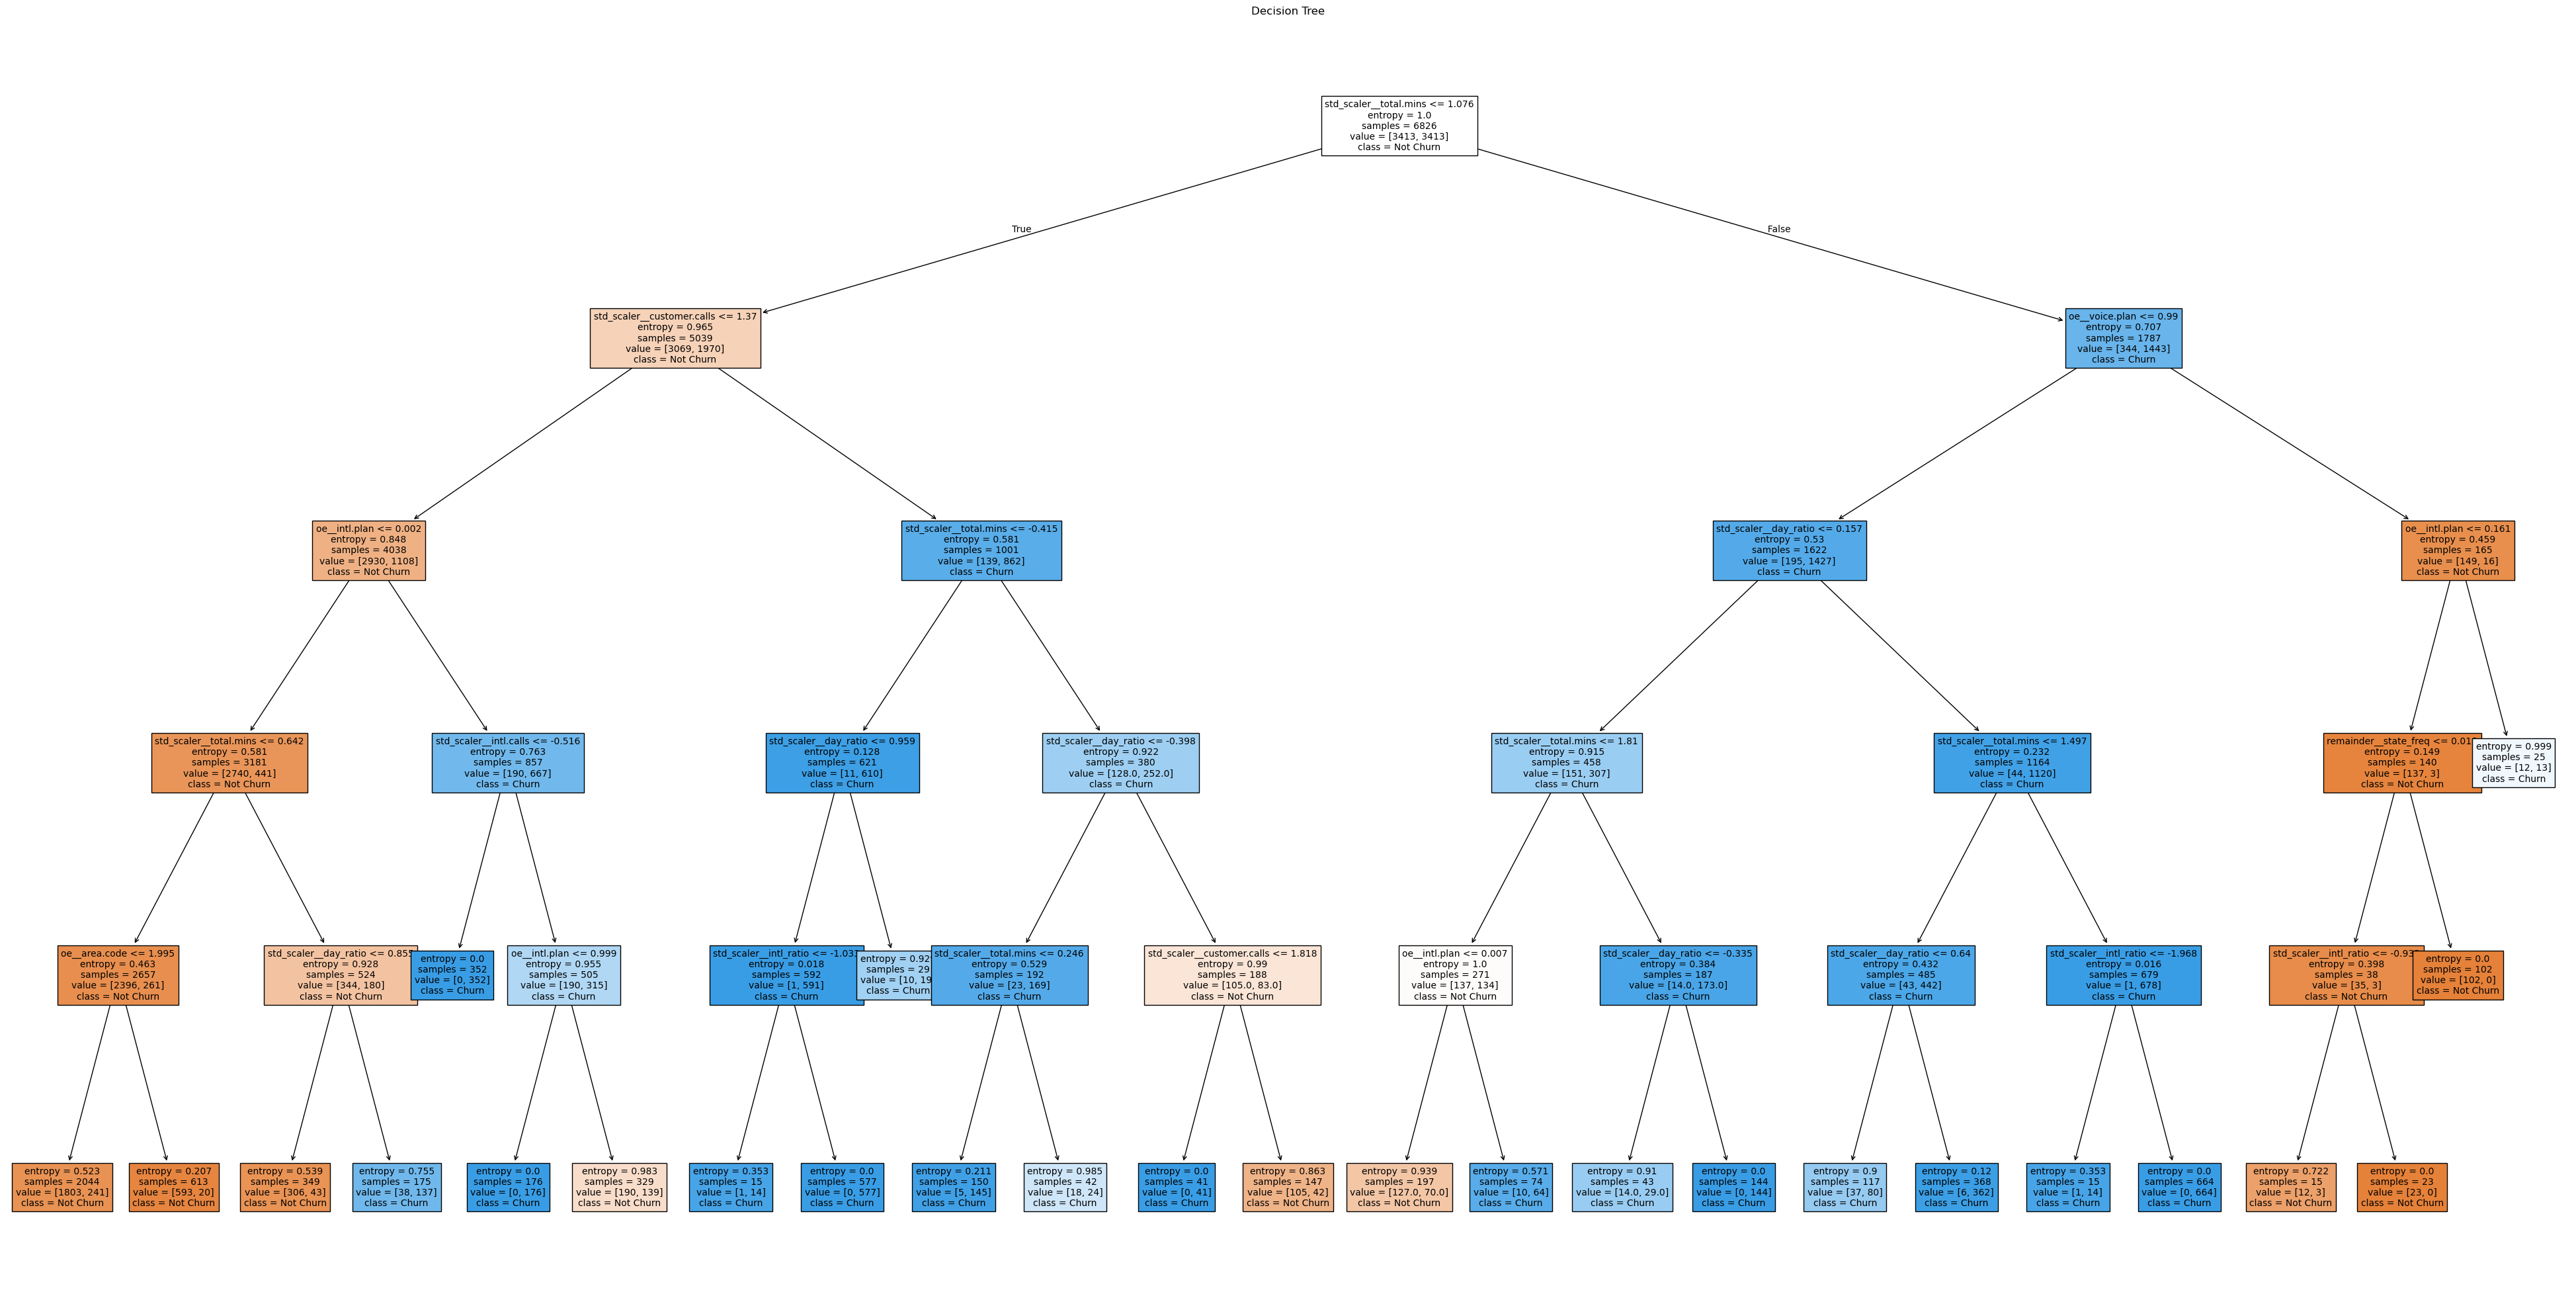

In [14]:
# plotting Decision tree

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(50,25))
plot_tree(
    best_models['Decision-Tree-classifier'],
    feature_names=X_train.columns,
    class_names=['Not Churn', 'Churn'],
    filled=True,
    fontsize=10
)
plt.title("Decision Tree")
plt.show()

In [15]:
# K-Nearest Neighbors (KNN)

from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()

In [16]:
# pipeline & hyperparameters dict

knn_pipeline = Pipeline([
    ('smote', SMOTE(random_state=38)),
    ('knn', knn_model)
])

knn_params = {
    'knn__n_neighbors': [7,11,15,19,25,31],
    'knn__weights': ['uniform', 'distance'],
    'knn__p': [1,2],
    'knn__metric': ['minkowski'],
    'knn__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

In [17]:
# model fitting

knn_grid = GridSearchCV(
    knn_pipeline,
    param_grid = knn_params,
    cv = 5,
    scoring='roc_auc'
)

knn_grid.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('smote', SMOTE(random_state=38)),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__algorithm': ['auto', 'ball_tree', 'kd_tree',
                                            'brute'],
                         'knn__metric': ['minkowski'],
                         'knn__n_neighbors': [7, 11, 15, 19, 25, 31],
                         'knn__p': [1, 2],
                         'knn__weights': ['uniform', 'distance']},
             scoring='roc_auc')

In [18]:
# best parameters & score

print("Best Params:", knn_grid.best_params_)
print("Best ROC-AUC:", knn_grid.best_score_)

Best Params: {'knn__algorithm': 'auto', 'knn__metric': 'minkowski', 'knn__n_neighbors': 31, 'knn__p': 1, 'knn__weights': 'distance'}
Best ROC-AUC: 0.8232962090523863


In [19]:
# adding best model to best_models dict

best_models['KNeighbors-classifier'] = knn_grid.best_estimator_.named_steps['knn']

In [73]:
# Support Vector Machine (SVM)

# Support Vector Classifier (SVC)

from sklearn.svm import SVC

svc_model = SVC(random_state=38,probability=True)

In [75]:
# pipeline & hyperparameters dict

svc_params = {
    'kernel': ['linear','rbf','poly'],
    'C': [0.1, 1, 10],
    'gamma': ['scale','auto'],
    'class_weight': [None, 'balanced']
}

In [76]:
# model fitting

svc_grid = GridSearchCV(
    svc_model,
    param_grid = svc_params,
    cv = 5,
    scoring='roc_auc'
)

svc_grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=SVC(probability=True, random_state=38),
             param_grid={'C': [0.1, 1, 10], 'class_weight': [None, 'balanced'],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']},
             scoring='roc_auc')

In [77]:
# best parameters & score

print("Best Params:", svc_grid.best_params_)
print("Best ROC-AUC:", svc_grid.best_score_)

Best Params: {'C': 1, 'class_weight': 'balanced', 'gamma': 'auto', 'kernel': 'rbf'}
Best ROC-AUC: 0.8840059928640038


In [78]:
# adding best model to best_models dict

best_models['SupportVector-classifier'] = svc_grid.best_estimator_

In [51]:
# Bagging

# Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

rfc_model = RandomForestClassifier(random_state=38)

In [52]:
# pipeline & hyperparameters dict

rfc_pipeline = Pipeline([
    ('smote', SMOTE(random_state=38)),
    ('rfc', rfc_model)
])

rfc_params = {
    'rfc__n_estimators': [100, 200,300],
    'rfc__max_depth': [None, 10, 15, 20],
    'rfc__min_samples_split': [2, 5, 10],
    'rfc__min_samples_leaf': [1, 2, 4],
    'rfc__max_features': ['sqrt', 'log2'],
}

In [53]:
# model fitting

from sklearn.model_selection import RandomizedSearchCV

rfc_grid = RandomizedSearchCV(
    rfc_pipeline,
    param_distributions = rfc_params,
    cv = 5,
    scoring='roc_auc',
    n_jobs=-1
)

rfc_grid.fit(X_train,y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('smote', SMOTE(random_state=38)),
                                             ('rfc',
                                              RandomForestClassifier(random_state=38))]),
                   n_jobs=-1,
                   param_distributions={'rfc__max_depth': [None, 10, 15, 20],
                                        'rfc__max_features': ['sqrt', 'log2'],
                                        'rfc__min_samples_leaf': [1, 2, 4],
                                        'rfc__min_samples_split': [2, 5, 10],
                                        'rfc__n_estimators': [100, 200, 300]},
                   scoring='roc_auc')

In [54]:
# best parameters & score

print("Best Params:", rfc_grid.best_params_)
print("Best ROC-AUC:", rfc_grid.best_score_)

Best Params: {'rfc__n_estimators': 300, 'rfc__min_samples_split': 5, 'rfc__min_samples_leaf': 2, 'rfc__max_features': 'sqrt', 'rfc__max_depth': 20}
Best ROC-AUC: 0.9189784318249765


In [55]:
# adding best model to best_models dict

best_models['RandomForest-classifier'] = rfc_grid.best_estimator_.named_steps['rfc']

In [56]:
# Boosting

# Extreme Gradient Boost Classifier : XGBC

from xgboost import XGBClassifier

xgb_model = XGBClassifier(random_state=38)

In [60]:
# pipeline & hyperparameters dict

xgb_pipeline = Pipeline([
    ('smote', SMOTE(random_state=38)),
    ('xgb', xgb_model)
])

xgb_params = {
    'xgb__n_estimators': [100, 200, 300],
    'xgb__max_depth': [None, 10, 20, 15],
    'xgb__gamma': [0.0, 0.1, 0.5, 1.0],
    'xgb__min_child_weight': [1, 5, 10],
    'xgb__colsample_bytree': [0.6, 0.8, 1.0],
    'xgb__subsample': [0.7, 0.9, 1.0]
}

In [61]:
# model fitting

xgb_grid = RandomizedSearchCV(
    xgb_pipeline,
    param_distributions= xgb_params,
    cv = 5,
    scoring='roc_auc',
    n_jobs=-1
)

xgb_grid.fit(X_train,y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('smote', SMOTE(random_state=38)),
                                             ('xgb',
                                              XGBClassifier(base_score=None,
                                                            booster=None,
                                                            callbacks=None,
                                                            colsample_bylevel=None,
                                                            colsample_bynode=None,
                                                            colsample_bytree=None,
                                                            device=None,
                                                            early_stopping_rounds=None,
                                                            enable_categorical=False,
                                                            eval_metric=None,
                                                            feature_types=None,
                                                            feature_weights=None,
                                                            gamma=None,
                                                            gro...
                                                            monotone_constraints=None,
                                                            multi_strategy=None,
                                                            n_estimators=None,
                                                            n_jobs=None,
                                                            num_parallel_tree=None, ...))]),
                   n_jobs=-1,
                   param_distributions={'xgb__colsample_bytree': [0.6, 0.8,
                                                                  1.0],
                                        'xgb__gamma': [0.0, 0.1, 0.5, 1.0],
                                        'xgb__max_depth': [None, 10, 20, 15],
                                        'xgb__min_child_weight': [1, 5, 10],
                                        'xgb__n_estimators': [100, 200, 300],
                                        'xgb__subsample': [0.7, 0.9, 1.0]},
                   scoring='roc_auc')

In [62]:
# best parameters & score

print("Best Params:", xgb_grid.best_params_)
print("Best ROC-AUC:", xgb_grid.best_score_)

Best Params: {'xgb__subsample': 0.9, 'xgb__n_estimators': 200, 'xgb__min_child_weight': 1, 'xgb__max_depth': 15, 'xgb__gamma': 0.0, 'xgb__colsample_bytree': 1.0}
Best ROC-AUC: 0.9237545143058938


In [63]:
# adding best model to best_models dict

best_models['XGBoost-classifier'] = xgb_grid.best_estimator_.named_steps['xgb']

In [64]:
# Boosting

# Light Gradeint Boosting Machine

# LightGB Classifier

import lightgbm as lgb

lgb_model = lgb.LGBMClassifier(random_state=38)

In [65]:
# pipeline & hyperparameters dict

lgb_pipeline = Pipeline([
    ('smote', SMOTE(random_state=38)),
    ('lgb', lgb_model)
])

lgb_params = {
    'lgb__n_estimators': [100, 200, 300],
    'lgb__max_depth': [3, 5, 7],
    'lgb__learning_rate': [0.01, 0.05, 0.1],
    'lgb__num_leaves': [15, 31, 63],
    'lgb__subsample': [0.8, 1.0]
}

In [66]:
# model fitting

lgb_grid = RandomizedSearchCV(
    lgb_pipeline,
    param_distributions= lgb_params,
    cv = 5,
    scoring='roc_auc',
    n_jobs=-1
)

lgb_grid.fit(X_train,y_train)

[LightGBM] [Info] Number of positive: 2731, number of negative: 2731
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001888 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4924
[LightGBM] [Info] Number of data points in the train set: 5462, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positi

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('smote', SMOTE(random_state=38)),
                                             ('lgb',
                                              LGBMClassifier(random_state=38))]),
                   n_jobs=-1,
                   param_distributions={'lgb__learning_rate': [0.01, 0.05, 0.1],
                                        'lgb__max_depth': [3, 5, 7],
                                        'lgb__n_estimators': [100, 200, 300],
                                        'lgb__num_leaves': [15, 31, 63],
                                        'lgb__subsample': [0.8, 1.0]},
                   scoring='roc_auc')

In [67]:
# best parameters & score

print("Best Params:", lgb_grid.best_params_)
print("Best ROC-AUC:", lgb_grid.best_score_)

Best Params: {'lgb__subsample': 1.0, 'lgb__num_leaves': 31, 'lgb__n_estimators': 200, 'lgb__max_depth': 7, 'lgb__learning_rate': 0.1}
Best ROC-AUC: 0.9206324436688789


In [68]:
# adding best model to best_models dict

best_models['LGBM-classifier'] = lgb_grid.best_estimator_.named_steps['lgb']

In [69]:
# list of all models with best params

best_models

{'Logistic-Regression': LogisticRegression(C=0.1, l1_ratio=0.1, max_iter=1000, penalty='l1',
                    random_state=38, solver='saga'),
 'Decision-Tree-classifier': DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=15,
                        min_samples_split=10, random_state=38),
 'KNeighbors-classifier': KNeighborsClassifier(n_neighbors=31, p=1, weights='distance'),
 'SupportVector-classifier': SVC(C=1, gamma='auto', probability=True, random_state=38),
 'RandomForest-classifier': RandomForestClassifier(max_depth=20, min_samples_leaf=2, min_samples_split=5,
                        n_estimators=300, random_state=38),
 'XGBoost-classifier': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=1.0, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               feature_weights=None, 

In [70]:
# Model Evaluation

In [71]:
# importing test set

import pandas as pd

X_test = pd.read_csv('X_test_transformed.csv')
y_test = pd.read_csv('y_test_transformed.csv')

y_test = y_test.squeeze()

In [79]:
# model fitting &

# model evaluation on test set

from sklearn.metrics import roc_auc_score,confusion_matrix,classification_report

for name,model in best_models.items():
    
    print(f"----------{name}----------")
    
    y_pred = model.predict(X_test)
    
    y_proba = model.predict_proba(X_test)[:, 1]

    print("Test ROC-AUC:", roc_auc_score(y_test, y_proba))
    print("classification report:\n",classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

----------Logistic-Regression----------
Test ROC-AUC: 0.7953809357715881
classification report:
               precision    recall  f1-score   support

           0       0.94      0.74      0.83       854
           1       0.32      0.72      0.44       141

    accuracy                           0.74       995
   macro avg       0.63      0.73      0.64       995
weighted avg       0.85      0.74      0.78       995

Confusion Matrix:
 [[635 219]
 [ 39 102]]
----------Decision-Tree-classifier----------
Test ROC-AUC: 0.9183151460793596
classification report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.95       854
           1       0.73      0.69      0.71       141

    accuracy                           0.92       995
   macro avg       0.84      0.82      0.83       995
weighted avg       0.92      0.92      0.92       995

Confusion Matrix:
 [[819  35]
 [ 44  97]]
----------KNeighbors-classifier----------
Test ROC-AUC: 0.80416

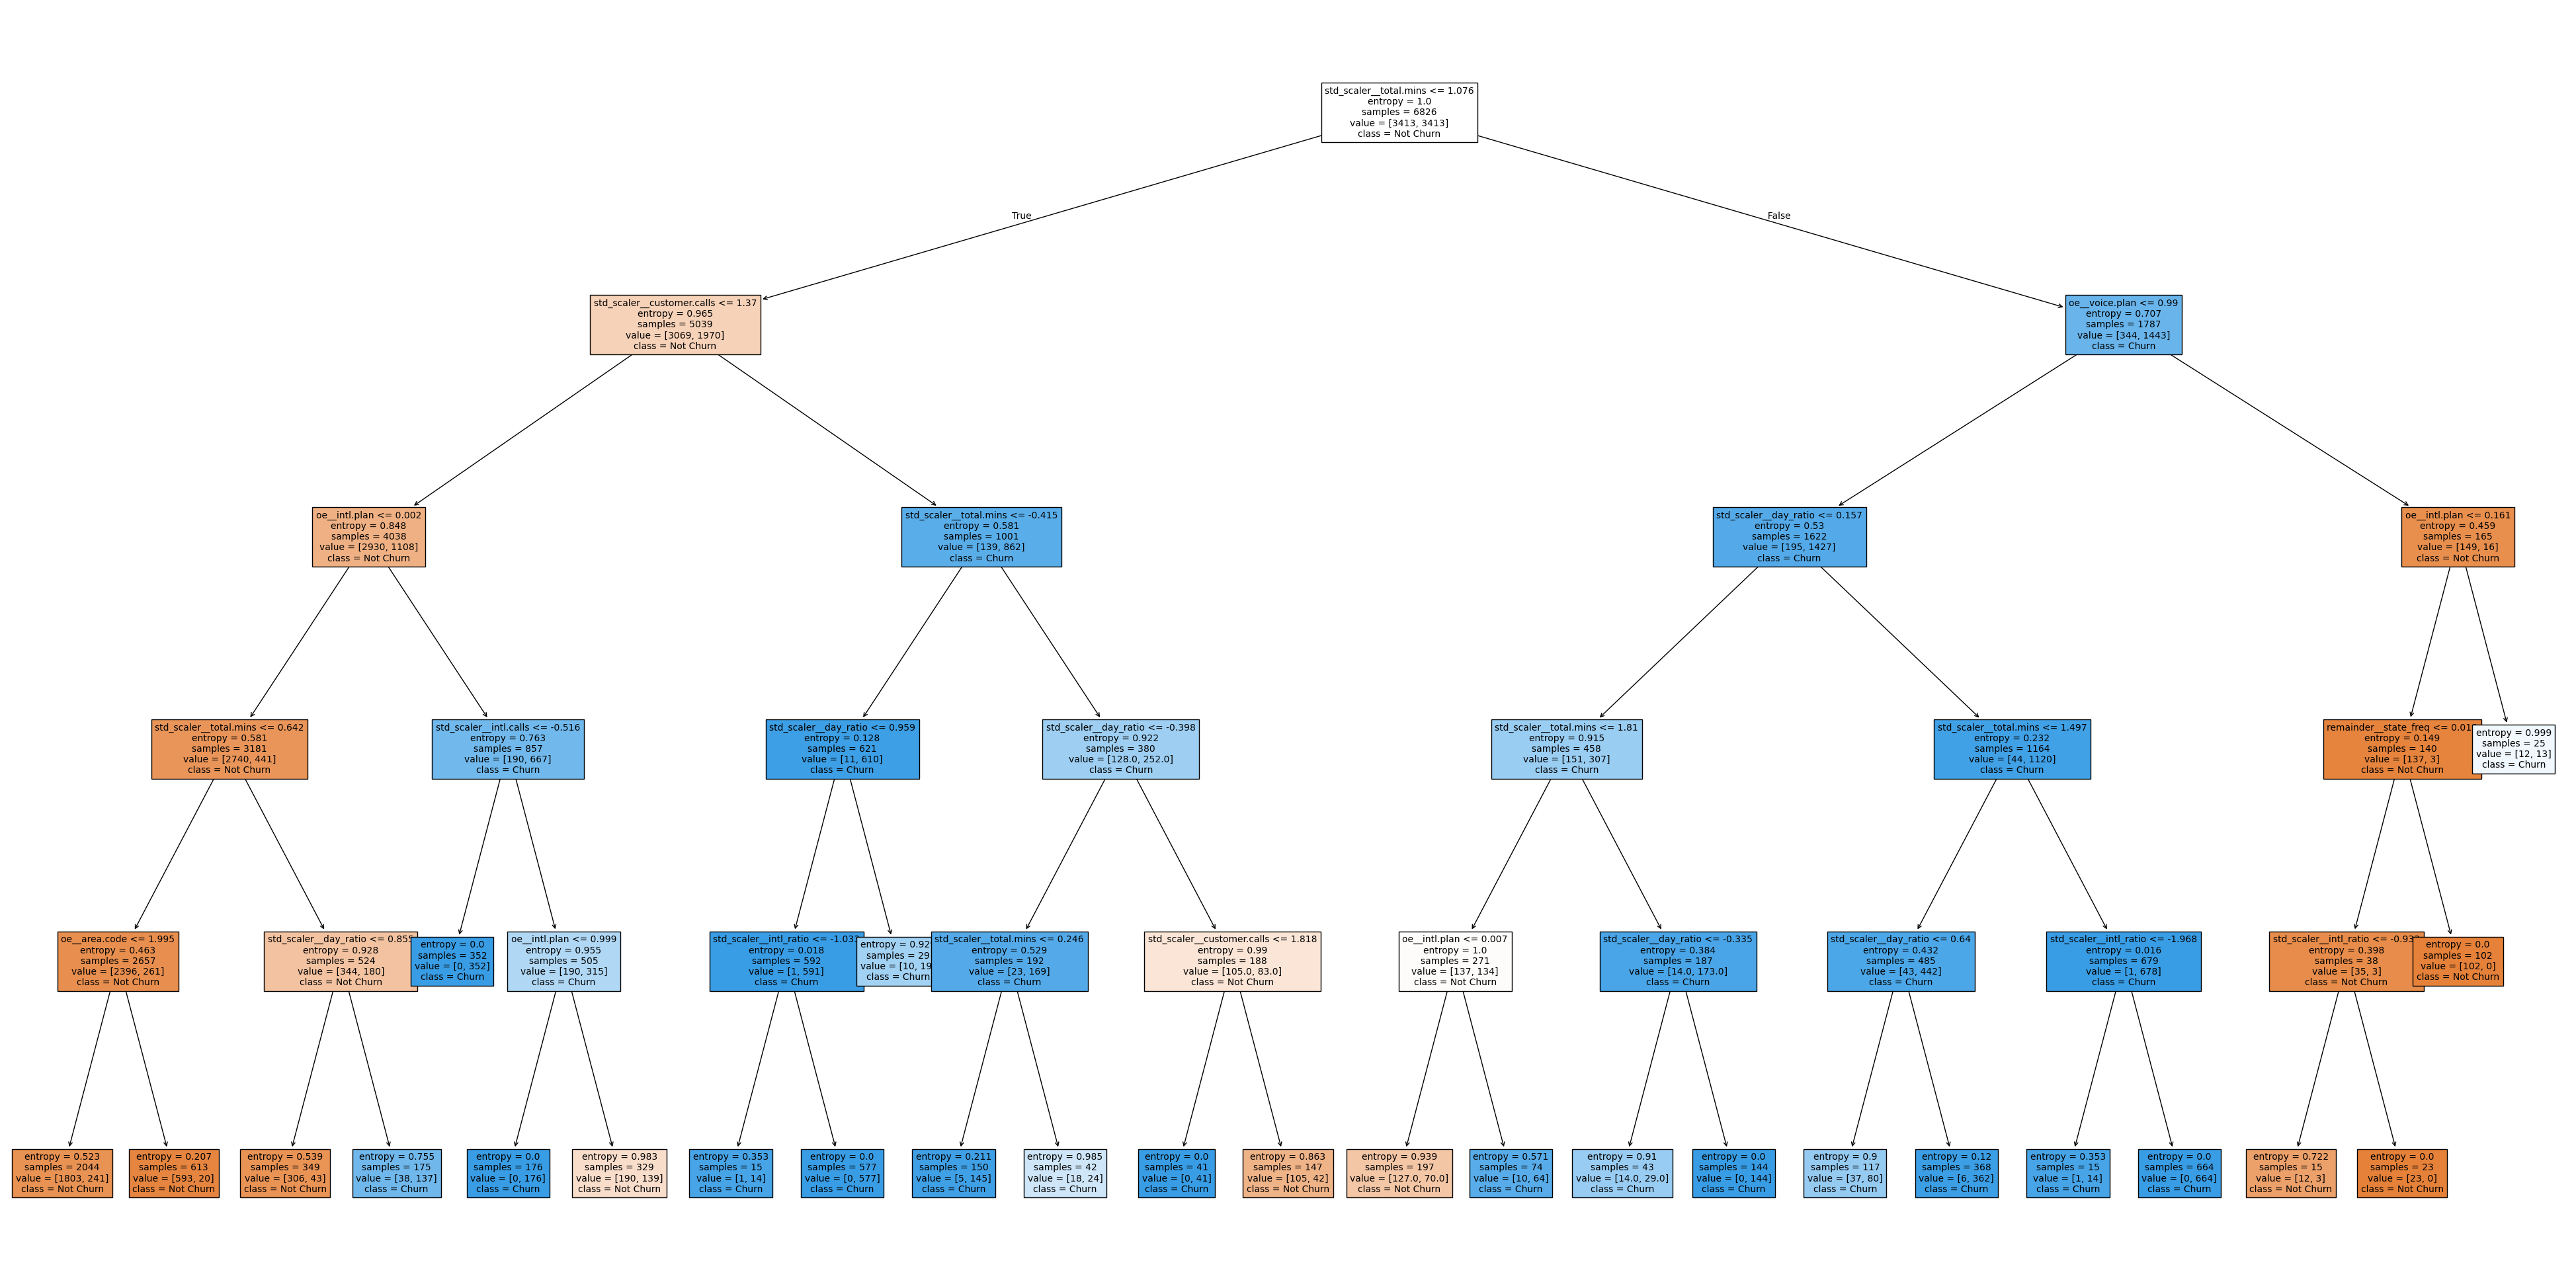

In [80]:
# plotting tree for Decision Tree classifier

import matplotlib.pyplot as plt

plt.figure(figsize=(50,25))
plot_tree(
    best_models['Decision-Tree-classifier'],
    feature_names=X_test.columns,
    class_names=['Not Churn', 'Churn'],
    filled=True,
    fontsize=10
)
plt.show()

----------Logistic-Regression----------


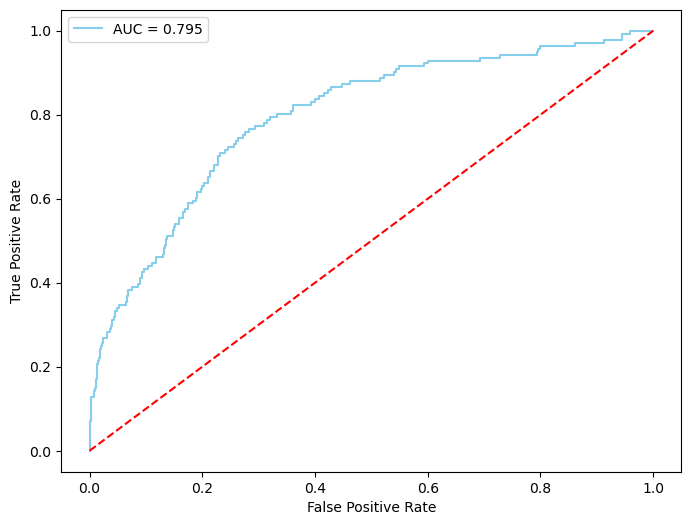

----------Decision-Tree-classifier----------


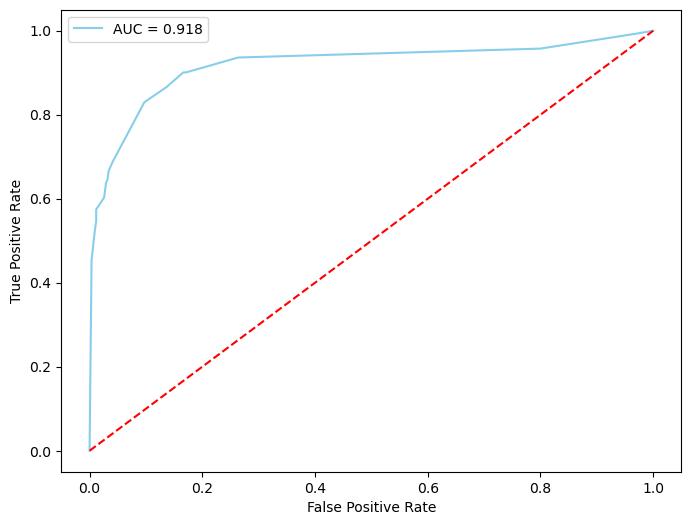

----------KNeighbors-classifier----------


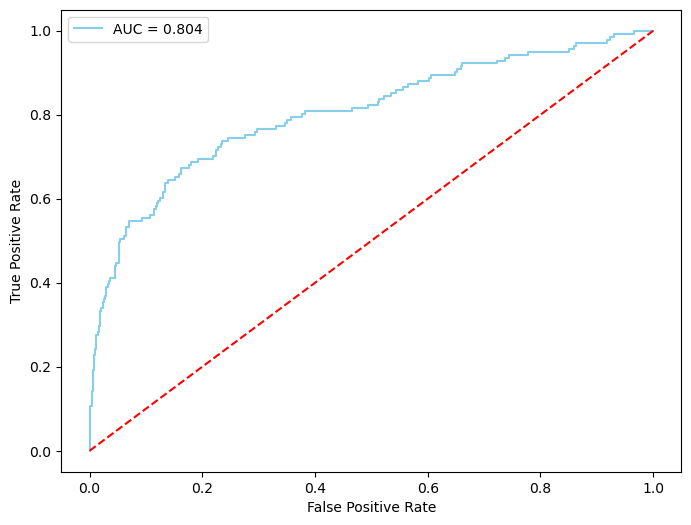

----------SupportVector-classifier----------


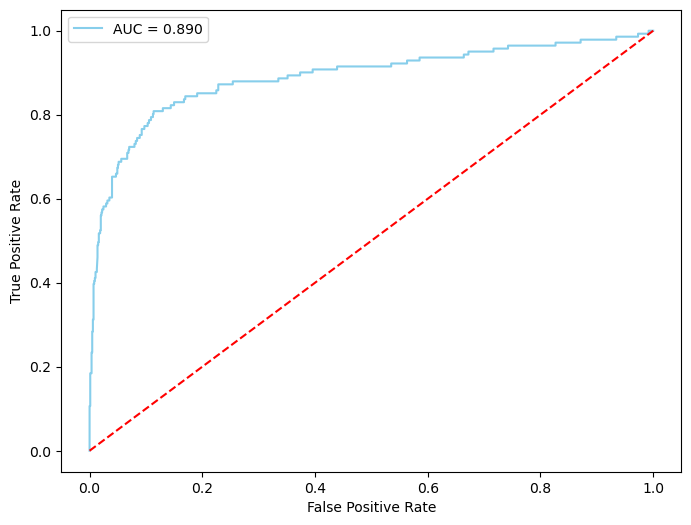

----------RandomForest-classifier----------


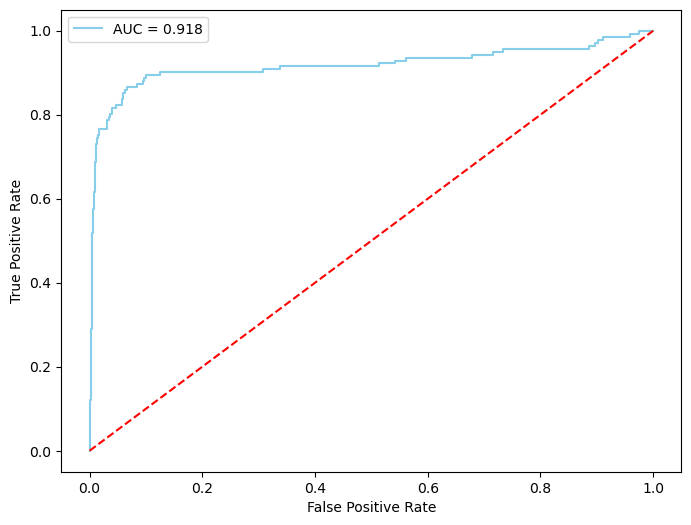

----------XGBoost-classifier----------


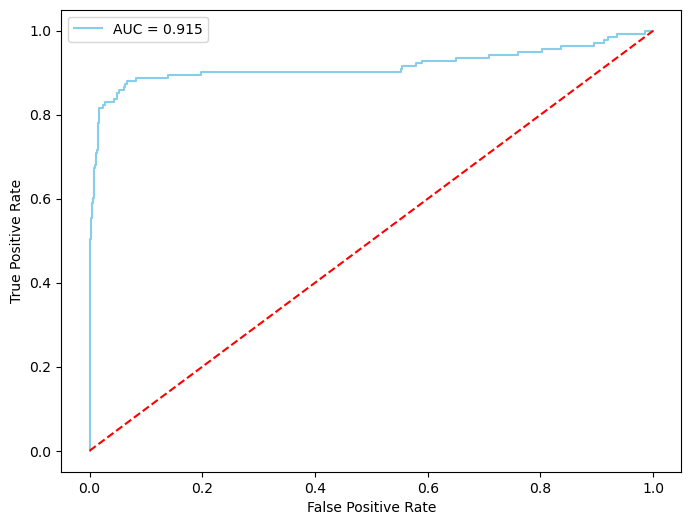

----------LGBM-classifier----------


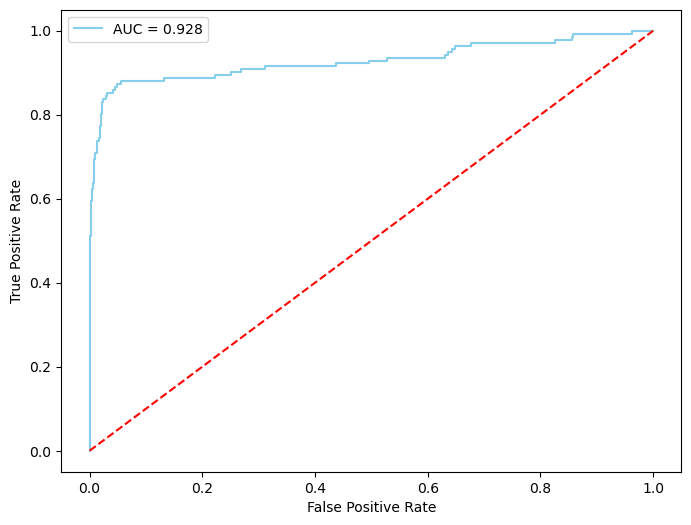

In [81]:
# plotting ROC curve

from sklearn.metrics import roc_curve

for name,model in best_models.items():
    print(f"----------{name}----------")

    y_proba = model.predict_proba(X_test)[:, 1]
    
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = roc_auc_score(y_test, y_proba)

    plt.figure(figsize=(8,6))
    plt.plot(fpr, tpr, color='skyblue', label=f'AUC = {roc_auc:.3f}')
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()

In [82]:
# saving best model as .pkl file

import joblib 

best_model = best_models['XGBoost-classifier']

with open('best_model.pkl','wb') as f:
    joblib.dump(best_model,f)

In [84]:
# getting TOP 5 key features 

from sklearn.inspection import permutation_importance

result = permutation_importance(
    best_model, X_test, y_test, 
    n_repeats=10, 
    random_state=38, 
    scoring='roc_auc' 
)

In [86]:
import pandas as pd

key_features = pd.DataFrame({
    'feature': X_test.columns,
    'importance_mean': result.importances_mean,
}).sort_values(by='importance_mean', ascending=False)

key_features.head(5)

,feature,importance_mean
8,std_scaler__total.mins,0.187498
17,std_scaler__customer.calls,0.128185
2,oe__intl.plan,0.114143
1,oe__voice.plan,0.036439
9,std_scaler__intl_ratio,0.033567


#### Top 5 Key Features:

- n_repeats : how many times to permute each feature
- scoring : which metric to evaluate performance drop on
- The function measures how much model performance drops when a feature’s values are randomly shuffled
- Larger drops == feature is more important